<a href="https://colab.research.google.com/github/YudyMancipe/Data_Analysis_Portfolio/blob/main/ventas_restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema a resolver:**

 identificar patrones en las ventas diarias de cada plato, comparar el rendimiento de los diferentes platos a lo largo de la semana, y obtener una visión general del total de ventas por plato para optimizar la oferta del restaurante.

# **Objetivos:**

**1. Visualizar las ventas diarias de cada plato:**

Crear un gráfico de barras para cada plato, donde el eje X represente los días de la semana y el eje Y muestre el número de ventas.
Añadir etiquetas a cada barra que indiquen la cantidad exacta de ventas para facilitar la interpretación.

**2. Comparar las ventas de todos los platos a lo largo de la semana:**

Crear un gráfico de líneas que permita observar cómo varían las ventas de cada plato durante la semana. Cada línea representará un plato, y los puntos en la línea indicarán las ventas en cada día de la semana.

**3. Calcular y visualizar las ventas totales semanales por plato:**

Sumar las ventas de cada plato durante toda la semana y agregar una columna de totales al DataFrame.
Crear un gráfico de barras para visualizar las ventas totales semanales por plato y añadir etiquetas a cada barra que indiquen el total de ventas.


Este ejercicio permitirá obtener una visión clara de las ventas de los platos durante la semana, lo que ayudará en la toma de decisiones sobre los platos que deben promocionarse o cambiarse en el menú del restaurante.

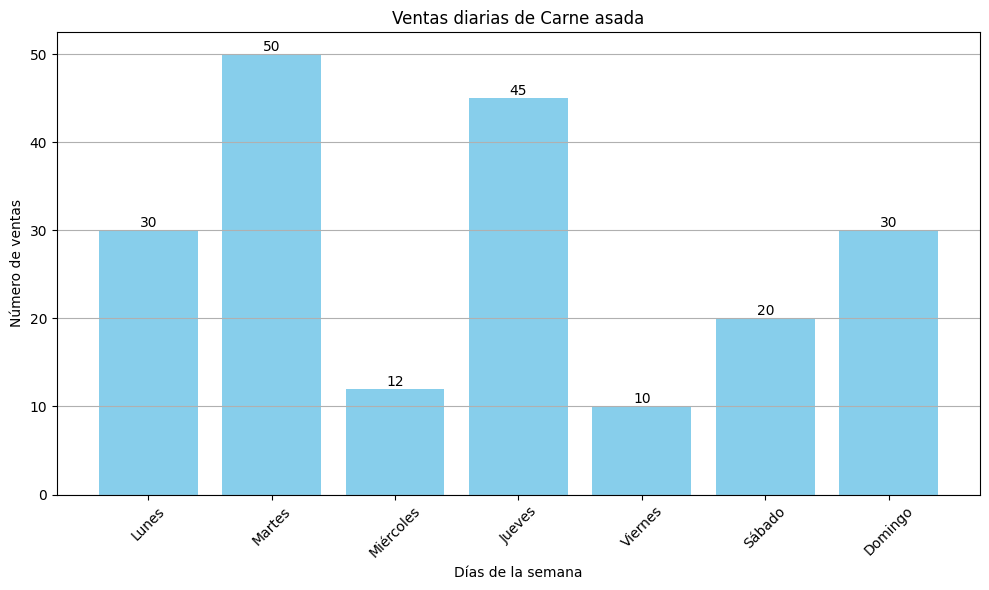

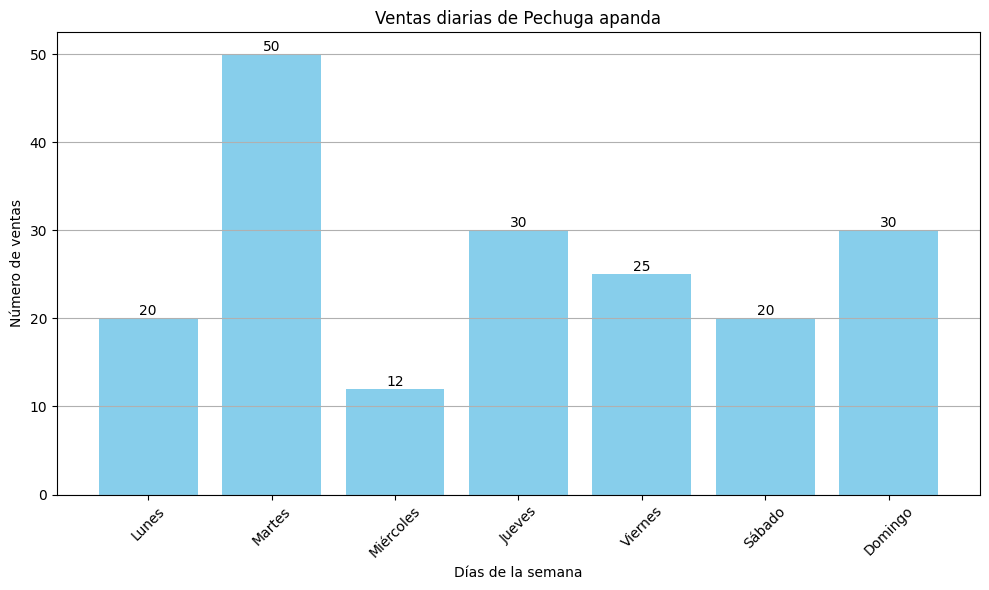

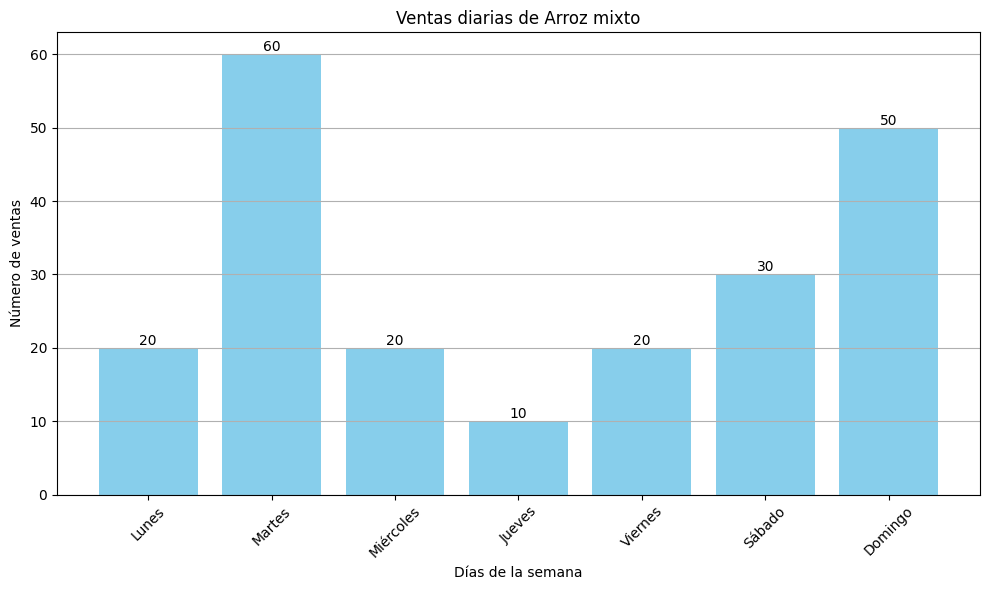

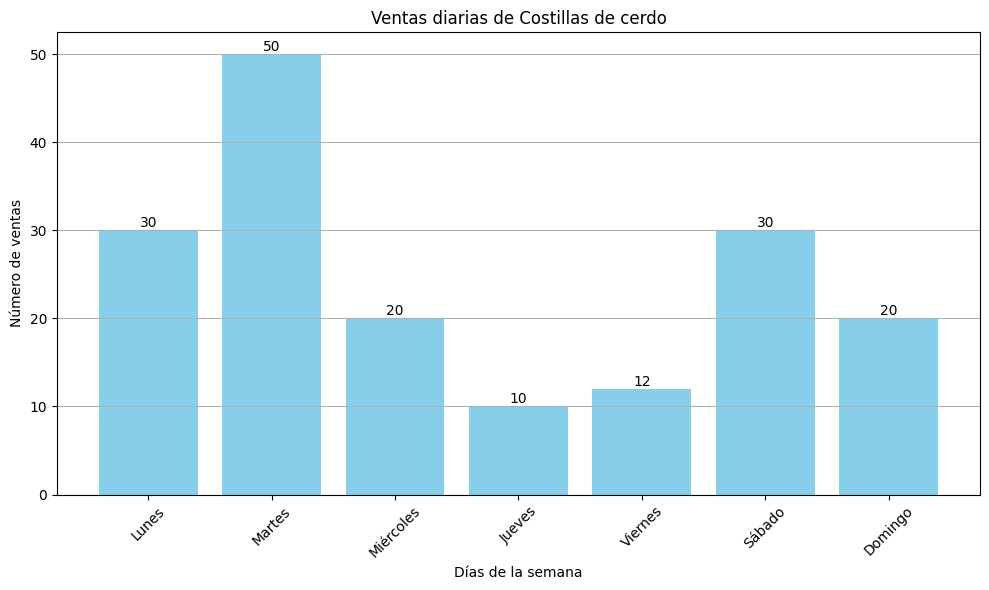

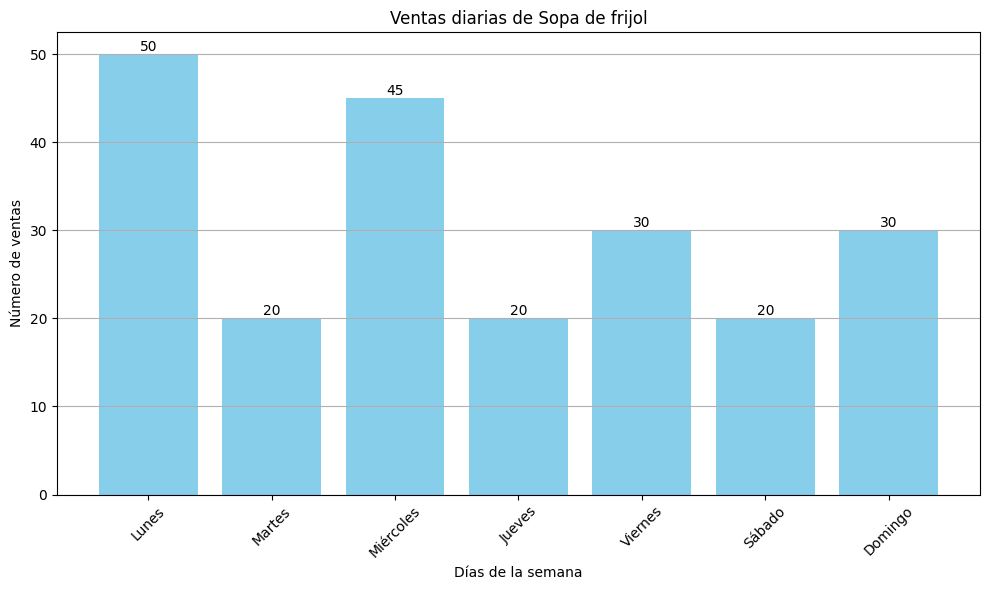

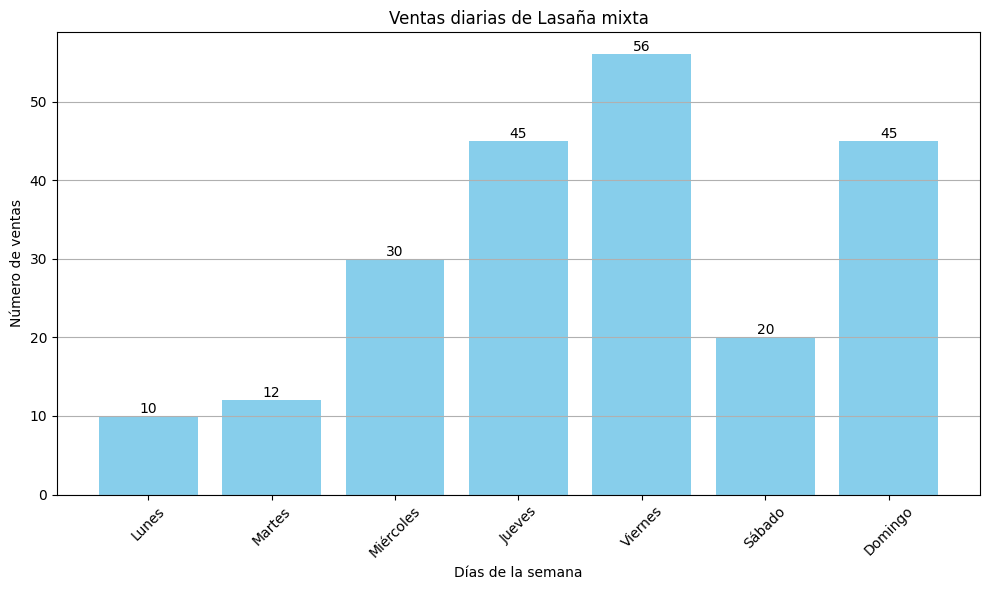

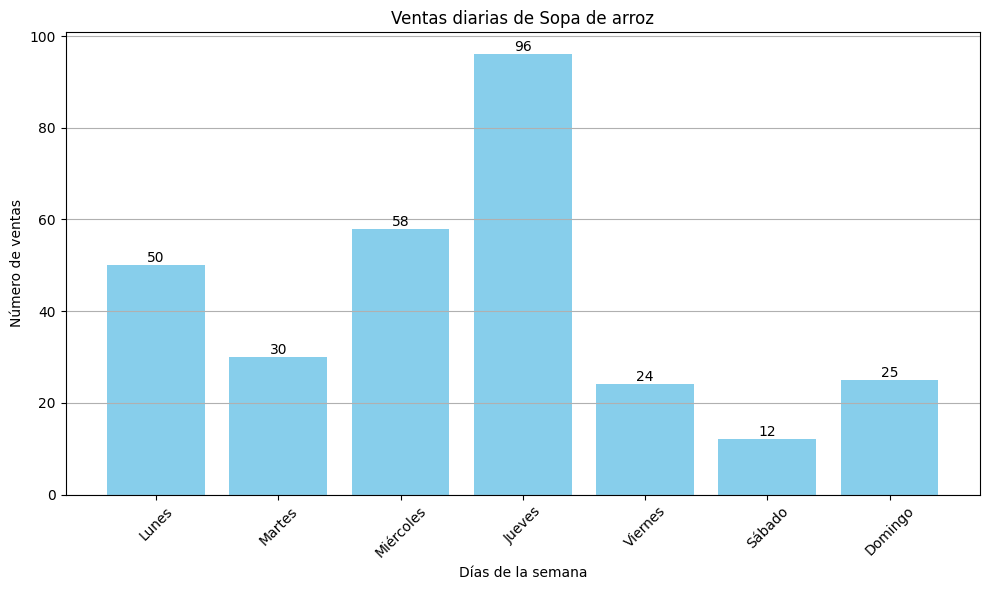

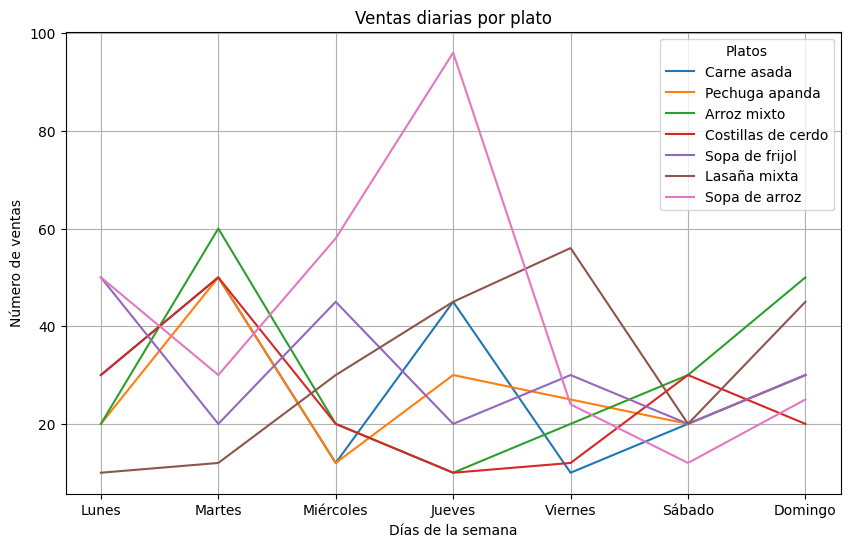

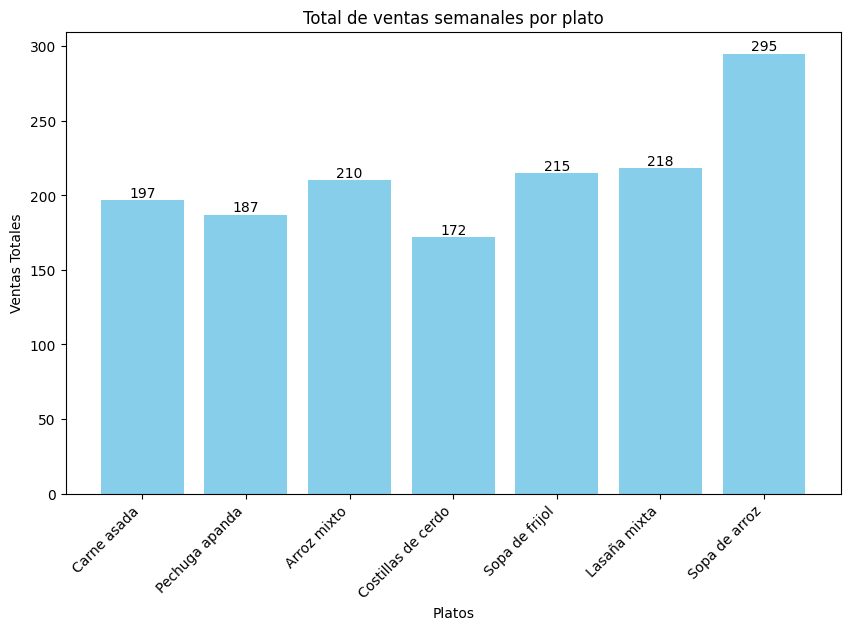

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel
df = pd.read_excel('Ventas_platos.xlsx')

# Lista de días para el gráfico
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear gráficos de barras, uno por cada plato
for index, row in df.iterrows():
    plt.figure(figsize=(10, 6))  # Crear una nueva figura para cada plato
    plt.bar(dias, row[1:], color='skyblue')  # Graficar las ventas diarias como barras

    # Añadir etiquetas a cada barra
    for barra in plt.bar(dias, row[1:], color='skyblue'):
        yval = barra.get_height()  # Obtener la altura de cada barra
        plt.text(barra.get_x() + barra.get_width()/2, yval, int(yval),
                 ha='center', va='bottom')  # Etiqueta en el centro de la barra

    plt.title(f'Ventas diarias de {row["Platos"]}')  # Título para cada gráfico
    plt.xlabel('Días de la semana')
    plt.ylabel('Número de ventas')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
    plt.grid(axis='y')  # Agregar cuadrícula en el eje y
    plt.tight_layout()  # Ajustar el layout para evitar que se corten etiquetas
    plt.show()  # Mostrar el gráfico

# Crear gráfico de líneas con un bucle while
plt.figure(figsize=(10, 6))

i = 0  # Inicializar contador
while i < len(df):
    # Obtener las ventas del plato en los días de la semana (excluyendo la columna 'Platos')
    ventas = df.iloc[i, 1:]  # Usar iloc para seleccionar la fila i y todas las columnas desde la segunda
    # Graficar la línea para el plato actual
    plt.plot(dias, ventas, label=df.iloc[i, 0])  # La primera columna contiene el nombre del plato
    i += 1  # Incrementar el contador para pasar al siguiente plato

# Personalizar gráfico
plt.title('Ventas diarias por plato')
plt.xlabel('Días de la semana')
plt.ylabel('Número de ventas')
plt.legend(title="Platos")
plt.grid(True)

# Mostrar gráfico
plt.show()

# Calcular los totales de cada plato usando while
totales_semanales = []
i = 0
while i < len(df):
    total = df.iloc[i, 1:].sum()  # Sumar ventas de lunes a domingo
    totales_semanales.append(total)
    i += 1

# Agregar la columna 'Total Semanal' al DataFrame
df['Total Semanal'] = totales_semanales

# Graficar el total de ventas semanales por plato en un gráfico de barras
plt.figure(figsize=(10, 6))
barras_totales = plt.bar(df['Platos'], df['Total Semanal'], color='skyblue')

# Añadir etiquetas a cada barra
for barra in barras_totales:
    yval = barra.get_height()  # Obtener la altura de cada barra
    plt.text(barra.get_x() + barra.get_width()/2, yval, int(yval),
             ha='center', va='bottom')  # Etiqueta en el centro de la barra

# Personalizar gráfico
plt.title('Total de ventas semanales por plato')
plt.xlabel('Platos')
plt.ylabel('Ventas Totales')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar gráfico
plt.show()
